# Final Project Exploratory Data Analysis

Do your EDA in this notebook!

# Hello World

In [269]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import tarfile
from six.moves import urllib
# print(f'I am using {pd.__name__} Version: {pd.__version__}.')
# print(f'It is installed at: {pd.__path__}')

In [354]:
raw = pd.read_csv('data/sport.csv')

In [271]:
# here is what i do not know. if were to move, where would i want to move? places that have ample climbing
#places thave have the most multipicth sport 5.7 climbing, 5.8, 5.9
# I want to know by state and by country
# I want to know which places have the top rated: state on x axis and count of top rated climbs on the y axis
# I want to know which areas have the highest climbs, regardless of rating, by location
# I want to plot the best areas on a map.

In [355]:
climbing.head(10)

Column,Route,Avg_Stars,Pitches,Length_(feet),Length_(meters),Area_Latitude,Area_Longitude,Loc_1,Loc_2,Loc_3,Loc_4,Loc_5,Loc_6,Route_type1,Route_type2,Route_type3,Class,Protection_Rating,Aid_Grading,URL
0,Jolly Rover,3.0,2,NaN,NaN,34.72040,-98.72670,Dog Wall,Treasure Cove,Oklahoma,USA,North America,Domestic,Sport,NaN,NaN,5.8,X,NaN,https://www.mountainproject.com/route/10765460...
1,Merci Me,2.8,2,190.0,58,49.68270,-123.14820,Grand Wall Base Area,The Chief,NaN,Canada,North America,International,Sport,NaN,NaN,5.8,R,NaN,https://www.mountainproject.com/route/10652746...
2,Pas Perdus,2.5,5,480.0,146,46.33730,7.26310,Sanetsch,Switzerland,NaN,Switzerland,Europe,International,Sport,NaN,NaN,5.9+,NaN,NaN,https://www.mountainproject.com/route/10629217...
3,Fun in the Sun,3.3,2,230.0,70,34.47098,-119.68953,Rattlesnake Canyon Crags (including Upper and ...,Santa Barbara,California,USA,North America,Domestic,Sport,NaN,NaN,5.8,R,NaN,https://www.mountainproject.com/route/10951841...
4,Il était temps!,2.8,2,180.0,55,45.97205,-74.13704,B. Secteur oublié,Baldy,NaN,Canada,North America,International,Sport,NaN,NaN,5.9+,NaN,NaN,https://www.mountainproject.com/route/11200996...
5,Virgin Suicides,2.9,2,140.0,43,40.25149,-75.82395,i. Sun Wall (Long Slabs),Birdsboro Quarry,Pennsylvania,USA,North America,Domestic,Sport,NaN,NaN,5.9+,NaN,NaN,https://www.mountainproject.com/route/10660781...
6,Walk In The High Country,3.3,5,500.0,152,30.50849,-98.81900,Devil's Slide,Main Dome,Texas,USA,North America,Domestic,Sport,NaN,NaN,5.8,PG13,NaN,https://www.mountainproject.com/route/10695417...
7,Saphir,3.3,5,400.0,122,43.20227,5.49820,La Saphir,Calanque d'En-Vau,NaN,France,Europe,International,Sport,NaN,NaN,5.8,PG13,NaN,https://www.mountainproject.com/route/10842495...
8,Idiopathic,2.3,4,700.0,213,33.46406,-113.36062,Courthouse Rock,Eagletail Mountains,Arizona,USA,North America,Domestic,Sport,NaN,NaN,5.9-,PG13,NaN,https://www.mountainproject.com/route/10708074...
9,A Little Adventurous,2.7,2,150.0,46,40.68960,-111.77493,Millcreek Monster,Millcreek Canyon,Utah,USA,North America,Domestic,Sport,NaN,NaN,5.8,PG13,NaN,https://www.mountainproject.com/route/11370292...


In [356]:
climbing.shape
#KEEP

(708, 20)

In [357]:
climbing['Route_type1'].value_counts()
# DO NOT use

Sport    708
Name: Route_type1, dtype: int64

In [358]:
climbing.dtypes

Column
Route                 object
Avg_Stars            float64
Pitches                int64
Length_(feet)        float64
Length_(meters)       object
Area_Latitude        float64
Area_Longitude       float64
Loc_1                 object
Loc_2                 object
Loc_3                 object
Loc_4                 object
Loc_5                 object
Loc_6                 object
Route_type1           object
Route_type2           object
Route_type3           object
Class                 object
Protection_Rating     object
Aid_Grading           object
URL                   object
dtype: object

In [359]:
climbing['Length_(meters)'].astype('float64')

ValueError: could not convert string to float: '1,067'

In [276]:
cols = list(climbing.columns.values)
sport = climbing[[cols[0]]  +  cols[1:20] ]
sport.head(5)
# KEEP THIS FOR FINAL PROJECT

Column,Route,Avg_Stars,Pitches,Length_(feet),Length_(meters),Area_Latitude,Area_Longitude,Loc_1,Loc_2,Loc_3,Loc_4,Loc_5,Loc_6,Route_type1,Route_type2,Route_type3,Class,Protection_Rating,Aid_Grading,URL
0,Jolly Rover,3.0,2,NaN,NaN,34.72040,-98.72670,Dog Wall,Treasure Cove,Oklahoma,USA,North America,Domestic,Sport,NaN,NaN,5.8,X,NaN,https://www.mountainproject.com/route/10765460...
1,Merci Me,2.8,2,190.0,58,49.68270,-123.14820,Grand Wall Base Area,The Chief,NaN,Canada,North America,International,Sport,NaN,NaN,5.8,R,NaN,https://www.mountainproject.com/route/10652746...
2,Pas Perdus,2.5,5,480.0,146,46.33730,7.26310,Sanetsch,Switzerland,NaN,Switzerland,Europe,International,Sport,NaN,NaN,5.9+,NaN,NaN,https://www.mountainproject.com/route/10629217...
3,Fun in the Sun,3.3,2,230.0,70,34.47098,-119.68953,Rattlesnake Canyon Crags (including Upper and ...,Santa Barbara,California,USA,North America,Domestic,Sport,NaN,NaN,5.8,R,NaN,https://www.mountainproject.com/route/10951841...
4,Il était temps!,2.8,2,180.0,55,45.97205,-74.13704,B. Secteur oublié,Baldy,NaN,Canada,North America,International,Sport,NaN,NaN,5.9+,NaN,NaN,https://www.mountainproject.com/route/11200996...


## Geographic Analysis

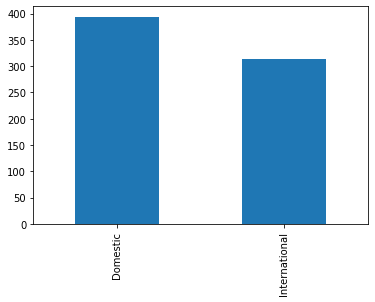

In [277]:
climbing['Loc_6'].value_counts().head(15).plot(kind='bar');
# Keep

In [278]:
sport['Loc_5'].value_counts()
#.head(10).plot(kind='barh');
# KEEP this one

North America    476
Europe           141
Africa            30
Asia              29
South America     20
Oceania           12
Name: Loc_5, dtype: int64

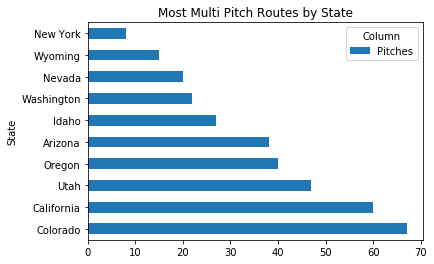

In [320]:
climbing[['Loc_3', 'Pitches']].groupby('Loc_3').count().sort_values('Pitches', ascending=False).head(10).plot(kind='barh');
plt.ylabel('State')
plt.title('Most Multi Pitch Routes by State');
# KEEP THIS IS A GOOD ONE

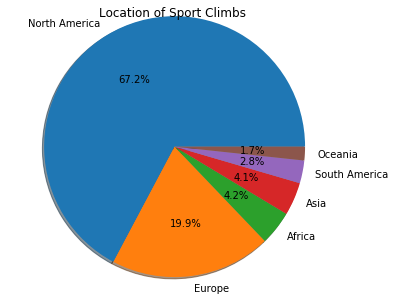

In [280]:
exp_vals = [476,141,30,29,20,12]
exp_labels = ['North America', 'Europe', 'Africa', 'Asia', 'South America', 'Oceania']
plt.axis('equal')
plt.pie(exp_vals, labels=exp_labels, radius = 1.5, autopct = '%0.1f%%', shadow = True)
plt.title('Location of Sport Climbs \n');

# DO NOT USE - this was for when i had sport, trad, top rope data which i do not have now

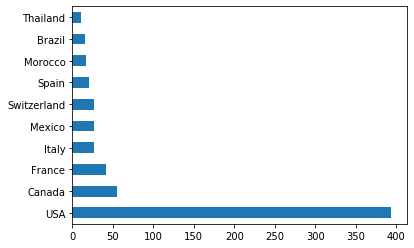

In [281]:
sport['Loc_4'].value_counts().head(10).plot(kind='barh');

## Length of Climbs

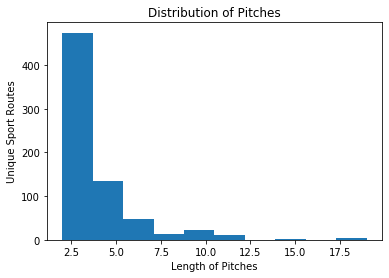

In [282]:
sport.Pitches.plot(kind='hist', bins=10)
plt.ylabel('Unique Sport Routes')
plt.xlabel('Length of Pitches')
plt.title('Distribution of Pitches');
# THIS GOES INTO FINAL PROJECT
# THE NEXT QUESTION IS, where are the long pitches located? Where are the short pitches located?

In [283]:
sport.sort_values(['Length_(feet)', 'Avg_Stars'], ascending=[0,0]).head(10)
# KEEP -  The longest pitches are international. I want to know more detail about that

Column,Route,Avg_Stars,Pitches,Length_(feet),Length_(meters),Area_Latitude,Area_Longitude,Loc_1,Loc_2,Loc_3,Loc_4,Loc_5,Loc_6,Route_type1,Route_type2,Route_type3,Class,Protection_Rating,Aid_Grading,URL
102,Moonwalker,4.0,19,3500.0,"1,067",-18.36256,-41.33499,Pedra Riscada,Minas Gerais,NaN,Brazil,South America,International,Sport,NaN,NaN,5.10a,PG13,NaN,https://www.mountainproject.com/route/11618110...
357,The Goat,3.2,19,2100.0,640,50.85270,-121.70470,Marble Canyon,Interior Plateau,NaN,Canada,North America,International,Sport,NaN,NaN,5.9,NaN,NaN,https://www.mountainproject.com/route/11514586...
387,Qui L'eut cru?,3.4,10,1800.0,549,31.58690,-5.59110,Jardins d'ete,Todra Gorge,NaN,Morocco,Africa,International,Sport,NaN,NaN,5.9,NaN,NaN,https://www.mountainproject.com/route/11404306...
604,Une arête dans la gorge,3.3,12,1800.0,549,31.58845,-5.59553,Arrete nord,Todra Gorge,NaN,Morocco,Africa,International,Sport,NaN,NaN,5.9+,NaN,NaN,https://www.mountainproject.com/route/11214078...
325,Flyboys,3.1,18,1800.0,549,48.62285,-120.44865,Goat Wall,Mazama,Washington,USA,North America,Domestic,Sport,NaN,NaN,5.9,NaN,NaN,https://www.mountainproject.com/route/11366537...
24,L'arete a Marion,4.0,14,1600.0,488,45.87235,6.46474,Col des Aravis,Northern Alps,NaN,France,Europe,International,Sport,NaN,NaN,5.7+,NaN,NaN,https://www.mountainproject.com/route/11350040...
167,Roberta Groba,4.0,10,1500.0,457,-22.33888,-42.72446,Capacete,Salinas / Três Picos,NaN,Brazil,South America,International,Sport,NaN,NaN,5.10a,NaN,NaN,https://www.mountainproject.com/route/11196149...
393,Sólidas Illusōes,3.5,11,1500.0,457,-22.33888,-42.72446,Capacete,Salinas / Três Picos,NaN,Brazil,South America,International,Sport,NaN,NaN,5.8+,NaN,NaN,https://www.mountainproject.com/route/11190305...
327,Royal Flush,3.0,8,1500.0,457,39.57230,-106.11100,Mount Royal (near Frisco),10 Mile Canyon,Colorado,USA,North America,Domestic,Sport,NaN,NaN,5.9,NaN,NaN,https://www.mountainproject.com/route/10681171...
364,Passion And Pain,4.0,7,1450.0,442,-16.01410,35.57370,Mulanje Massif,Malawi,NaN,Malawi,Africa,International,Sport,NaN,NaN,5.9,NaN,NaN,https://www.mountainproject.com/route/11615466...


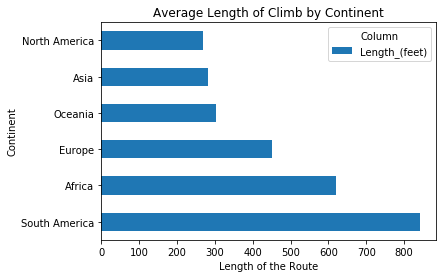

In [284]:
climbing[['Loc_5', 'Length_(feet)']].groupby('Loc_5').mean().sort_values('Length_(feet)',\
                                   ascending=False).plot(kind='barh')
plt.ylabel('Continent')
plt.xlabel('Length of the Route')
plt.title('Average Length of Climb by Continent');

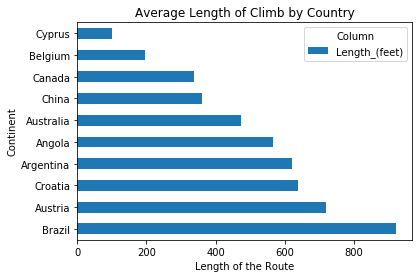

In [285]:
climbing[['Loc_4', 'Length_(feet)']].groupby('Loc_4').mean().head(10).sort_values('Length_(feet)',\
                                   ascending=False).plot(kind='barh')
plt.ylabel('Continent')
plt.xlabel('Length of the Route')
plt.title('Average Length of Climb by Country');

In [286]:
very_long = sport.Pitches >= 12
very_long.head()
sport[very_long].sort_values('Length_(feet)', ascending = False).head(5)
# KEEP this identifies the long pitches
# Brazil is a funny outlier..it has the longest sport climb but South America is only 2.8% of the climbs!

Column,Route,Avg_Stars,Pitches,Length_(feet),Length_(meters),Area_Latitude,Area_Longitude,Loc_1,Loc_2,Loc_3,Loc_4,Loc_5,Loc_6,Route_type1,Route_type2,Route_type3,Class,Protection_Rating,Aid_Grading,URL
102,Moonwalker,4.0,19,3500.0,"1,067",-18.36256,-41.33499,Pedra Riscada,Minas Gerais,NaN,Brazil,South America,International,Sport,NaN,NaN,5.10a,PG13,NaN,https://www.mountainproject.com/route/11618110...
357,The Goat,3.2,19,2100.0,640,50.85270,-121.70470,Marble Canyon,Interior Plateau,NaN,Canada,North America,International,Sport,NaN,NaN,5.9,NaN,NaN,https://www.mountainproject.com/route/11514586...
325,Flyboys,3.1,18,1800.0,549,48.62285,-120.44865,Goat Wall,Mazama,Washington,USA,North America,Domestic,Sport,NaN,NaN,5.9,NaN,NaN,https://www.mountainproject.com/route/11366537...
604,Une arête dans la gorge,3.3,12,1800.0,549,31.58845,-5.59553,Arrete nord,Todra Gorge,NaN,Morocco,Africa,International,Sport,NaN,NaN,5.9+,NaN,NaN,https://www.mountainproject.com/route/11214078...
24,L'arete a Marion,4.0,14,1600.0,488,45.87235,6.46474,Col des Aravis,Northern Alps,NaN,France,Europe,International,Sport,NaN,NaN,5.7+,NaN,NaN,https://www.mountainproject.com/route/11350040...


## Climbing Difficulty Analysis (maybe put this at the beginning)

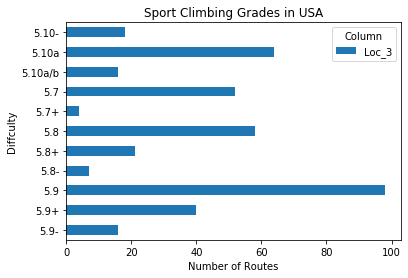

In [287]:
usa = climbing[['Loc_3', 'Class']].groupby('Class').count().sort_values('Class', ascending=False).plot(kind='barh')
plt.ylabel('Diffculty')
plt.xlabel('Number of Routes')
plt.title('Sport Climbing Grades in USA');

In [288]:
most_popular = sport.Pitches < 4
most_popular.head()
sport[most_popular].sort_values('Avg_Stars', ascending = False).head(5)

Column,Route,Avg_Stars,Pitches,Length_(feet),Length_(meters),Area_Latitude,Area_Longitude,Loc_1,Loc_2,Loc_3,Loc_4,Loc_5,Loc_6,Route_type1,Route_type2,Route_type3,Class,Protection_Rating,Aid_Grading,URL
65,Pili y su catarro,4.0,2,180.0,55,41.64893,-1.72041,Peña de los Buitres,"Calcena, Aragón",NaN,Spain,Europe,International,Sport,NaN,NaN,5.9-,NaN,NaN,https://www.mountainproject.com/route/11075796...
564,Creamsicle Buttress,4.0,2,200.0,61,47.88339,-119.09213,Road Side Rock,Banks Lake / Northrup Canyon,Washington,USA,North America,Domestic,Sport,NaN,NaN,5.8,NaN,NaN,https://www.mountainproject.com/route/11533953...
164,The Cave Route,4.0,2,120.0,37,43.22272,-123.56263,Treasure Island,The Callahans,Oregon,USA,North America,Domestic,Sport,NaN,NaN,5.10a,NaN,NaN,https://www.mountainproject.com/route/11766865...
173,Triple Adu,4.0,3,500.0,152,37.33382,-119.39864,South Face,North Eagle Beak,California,USA,North America,Domestic,Sport,NaN,NaN,5.10a,NaN,NaN,https://www.mountainproject.com/route/11894387...
48,The Corona Jewel,4.0,2,60.0,18,53.46853,-113.56529,Horizon Village Wall,Whitemud Creek,NaN,Canada,North America,International,Sport,NaN,NaN,5.9+,PG13,NaN,https://www.mountainproject.com/route/11876674...


In [289]:
climbing_class = pd.DataFrame(climbing['Class'].value_counts(ascending=False))
climbing_class.index.name = 'Class Rating'
climbing_class.columns=['Count']
climbing_class.sort_values('Count', ascending=False, inplace=True)
climbing_class
# KEEP THIS FOR FINAL PROJECT

,Count
Class Rating,
5.9,173
5.10a,146
5.8,101
5.7,73
5.9+,73
5.8+,39
5.10a/b,31
5.10-,27
5.9-,23


In [290]:
climbing.columns

Index(['Route', 'Avg_Stars', 'Pitches', 'Length_(feet)', 'Length_(meters)',
       'Area_Latitude', 'Area_Longitude', 'Loc_1', 'Loc_2', 'Loc_3', 'Loc_4',
       'Loc_5', 'Loc_6', 'Route_type1', 'Route_type2', 'Route_type3', 'Class',
       'Protection_Rating', 'Aid_Grading', 'URL'],
      dtype='object', name='Column')

In [291]:
pd.DataFrame(climbing.dtypes, columns = ['DataTypes'])

,DataTypes
Column,
Route,object
Avg_Stars,float64
Pitches,int64
Length_(feet),float64
Length_(meters),object
Area_Latitude,float64
Area_Longitude,float64
Loc_1,object
Loc_2,object


## Is there a state or country that has the longest pitches?

In [361]:
climbing['Length_(feet)'].dropna().value_counts(dropna=True)

200.0     52
400.0     38
150.0     36
180.0     34
300.0     25
          ..
3500.0     1
177.0      1
1450.0     1
459.0      1
118.0      1
Name: Length_(feet), Length: 114, dtype: int64

In [366]:
climbing [ ['Loc_4', 'Pitches', 'Length_(feet)' ]].groupby('Loc_4').mean().\
sort_values(by='Length_(feet)', ascending=False).head(10)

Column,Pitches,Length_(feet)
Loc_4,,
Malawi,6.500000,1175.000000
Brazil,6.666667,922.785714
Madagascar,6.000000,775.000000
Austria,7.250000,720.000000
India,6.500000,700.000000
Switzerland,6.777778,655.384615
Croatia,6.500000,637.500000
Argentina,7.600000,620.000000
Morocco,4.823529,618.823529


In [367]:
climbing [ ['Loc_3', 'Pitches', 'Length_(feet)' ]].groupby('Loc_3').mean().\
sort_values(by='Length_(feet)', ascending=False).head(10)

Column,Pitches,Length_(feet)
Loc_3,,
Texas,3.250000,425.000000
Montana,3.166667,345.833333
Wyoming,3.066667,339.642857
North Carolina,3.500000,332.500000
Washington,3.500000,301.944444
Colorado,2.865672,290.384615
New York,2.375000,286.250000
Vemont,3.000000,280.000000
Arizona,3.052632,267.702703


In [292]:
stars = pd.DataFrame(climbing['Avg_Stars'].value_counts())
stars.index.name = 'Stars'
stars.columns=['Number of Routes']
stars.sort_values('Stars', ascending=False, inplace=True)
stars
# i want to figure out how to ascending by the (is it called index?) left most column

,Number of Routes
Stars,
4.0,41
3.9,6
3.8,11
3.7,8
3.6,7
3.5,31
3.4,15
3.3,49
3.2,21


In [ ]:
# NEXT DO GROUP BY FOR TOP RATED CLIMBS IN USA and in EUROPE

## Among These Thrill Seekers, Where are the Boldest?

In [293]:
protection = pd.DataFrame(climbing['Protection_Rating'].value_counts())
protection.index.name = "Rating"
protection
#i want to graph this also. not a pie chart. 

,Protection_Rating
Rating,
PG13,50
R,11
X,1


In [317]:
climbing[['Protection_Rating', 'Loc_4']].groupby('Loc_4').count().\
sort_values(by='Protection_Rating', ascending = False).head(4)

Column,Protection_Rating
Loc_4,
USA,40
Brazil,3
Canada,3
Italy,3


In [333]:
climbing[['Protection_Rating', 'Loc_3']].groupby('Loc_3').count().sort_values(by='Protection_Rating', ascending = False).head(6)

Column,Protection_Rating
Loc_3,
California,10
Oregon,6
Arizona,5
North Carolina,2
Nevada,2
Utah,2


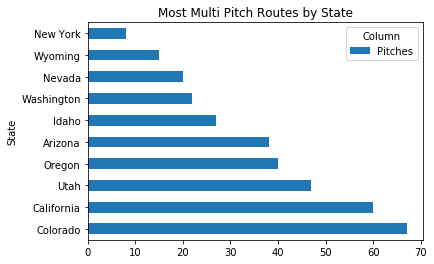

In [321]:
climbing[['Loc_3', 'Pitches']].groupby('Loc_3').count().sort_values('Pitches', ascending=False).head(10).plot(kind='barh');
plt.ylabel('State')
plt.title('Most Multi Pitch Routes by State');
# KEEP THIS IS A GOOD ONE

In [295]:
null_df = pd.DataFrame(climbing.isnull().sum(), columns =['Count of Nulls'])
null_df.index.name = 'Column'
null_df.sort_values('Count of Nulls', ascending=False, inplace=True)
null_df
# DO NOT INCLUDE

,Count of Nulls
Column,
Aid_Grading,707
Route_type3,707
Route_type2,707
Protection_Rating,646
Loc_3,314
Length_(feet),67
Length_(meters),67
Route,0
Loc_6,0


In [296]:
climbing.fillna(value={'Loc 3':'-', 'Loc 4':'-', 'Loc 5': '-', 'Loc 6': '-', 'Length (feet)':'Not Measured', 'Protection Rating':'G or PG', 'Aid Climbing Grading':'Not Given', 'Route Type 3':'-', 'Route Type 2':'-'}).head(10)

Column,Route,Avg_Stars,Pitches,Length_(feet),Length_(meters),Area_Latitude,Area_Longitude,Loc_1,Loc_2,Loc_3,Loc_4,Loc_5,Loc_6,Route_type1,Route_type2,Route_type3,Class,Protection_Rating,Aid_Grading,URL
0,Jolly Rover,3.0,2,NaN,NaN,34.72040,-98.72670,Dog Wall,Treasure Cove,Oklahoma,USA,North America,Domestic,Sport,NaN,NaN,5.8,X,NaN,https://www.mountainproject.com/route/10765460...
1,Merci Me,2.8,2,190.0,58,49.68270,-123.14820,Grand Wall Base Area,The Chief,NaN,Canada,North America,International,Sport,NaN,NaN,5.8,R,NaN,https://www.mountainproject.com/route/10652746...
2,Pas Perdus,2.5,5,480.0,146,46.33730,7.26310,Sanetsch,Switzerland,NaN,Switzerland,Europe,International,Sport,NaN,NaN,5.9+,NaN,NaN,https://www.mountainproject.com/route/10629217...
3,Fun in the Sun,3.3,2,230.0,70,34.47098,-119.68953,Rattlesnake Canyon Crags (including Upper and ...,Santa Barbara,California,USA,North America,Domestic,Sport,NaN,NaN,5.8,R,NaN,https://www.mountainproject.com/route/10951841...
4,Il était temps!,2.8,2,180.0,55,45.97205,-74.13704,B. Secteur oublié,Baldy,NaN,Canada,North America,International,Sport,NaN,NaN,5.9+,NaN,NaN,https://www.mountainproject.com/route/11200996...
5,Virgin Suicides,2.9,2,140.0,43,40.25149,-75.82395,i. Sun Wall (Long Slabs),Birdsboro Quarry,Pennsylvania,USA,North America,Domestic,Sport,NaN,NaN,5.9+,NaN,NaN,https://www.mountainproject.com/route/10660781...
6,Walk In The High Country,3.3,5,500.0,152,30.50849,-98.81900,Devil's Slide,Main Dome,Texas,USA,North America,Domestic,Sport,NaN,NaN,5.8,PG13,NaN,https://www.mountainproject.com/route/10695417...
7,Saphir,3.3,5,400.0,122,43.20227,5.49820,La Saphir,Calanque d'En-Vau,NaN,France,Europe,International,Sport,NaN,NaN,5.8,PG13,NaN,https://www.mountainproject.com/route/10842495...
8,Idiopathic,2.3,4,700.0,213,33.46406,-113.36062,Courthouse Rock,Eagletail Mountains,Arizona,USA,North America,Domestic,Sport,NaN,NaN,5.9-,PG13,NaN,https://www.mountainproject.com/route/10708074...
9,A Little Adventurous,2.7,2,150.0,46,40.68960,-111.77493,Millcreek Monster,Millcreek Canyon,Utah,USA,North America,Domestic,Sport,NaN,NaN,5.8,PG13,NaN,https://www.mountainproject.com/route/11370292...
